In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
data = pd.read_csv("Cars_Data.csv")

In [5]:
#convert all lap times into seconds
pattern = data['Lap Time'].str.extract(r"(\d+)\:(\d+\.\d+)")
condition = (data['Lap Time'].str.contains(r"(\d+)\:(\d+\.\d+)")) & (data['Lap Time'].notnull())
#Copy Lap Time column to Lap_Time
data['Lap_Time'] = data['Lap Time']
#Override the lap_time that match the pattern with transformed lap time
data.loc[condition, 'Lap_Time'] = pattern.loc[condition, 0].astype(float)*60 + pattern.loc[condition, 1].astype(float)
#Delete the Original lap time column
data = data.drop('Lap Time', axis =1)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


In [6]:
#Ensure lap time data is numerical with float type
data['Lap_Time'] = data['Lap_Time'].astype(float)

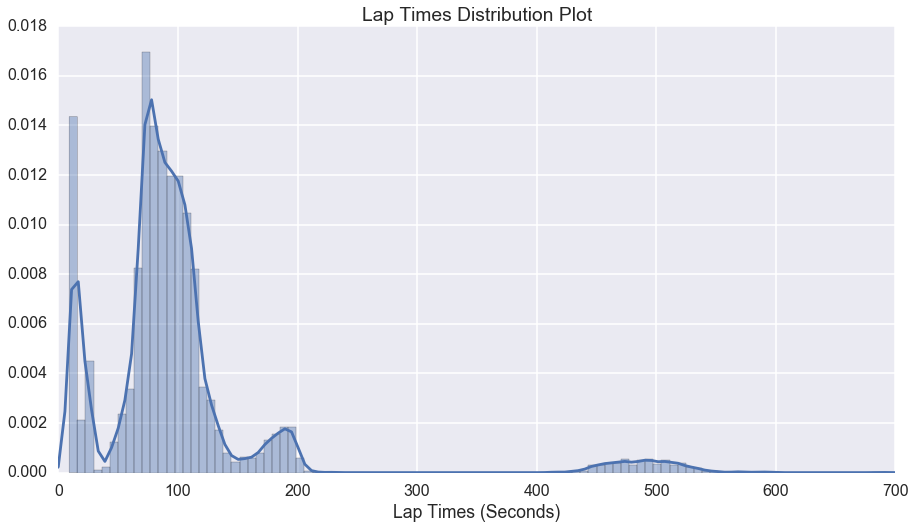

In [81]:
plt.figure(figsize =(15,8))
sns.set_context('poster')
sns.distplot(data['Lap_Time'], bins =100)
plt.xlim(0, 700)
plt.xlabel('Lap Times (Seconds)')
plt.title('Lap Times Distribution Plot')
plt.show()

C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


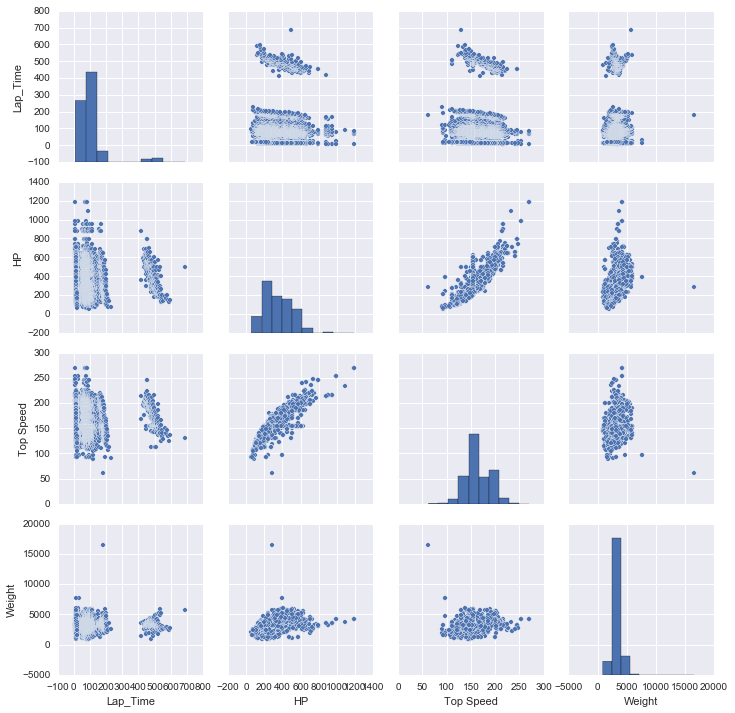

In [8]:
sns.set_context('notebook')
sns.pairplot(data[['Lap_Time', 'HP', 'Top Speed' , 'Weight']])
plt.show()

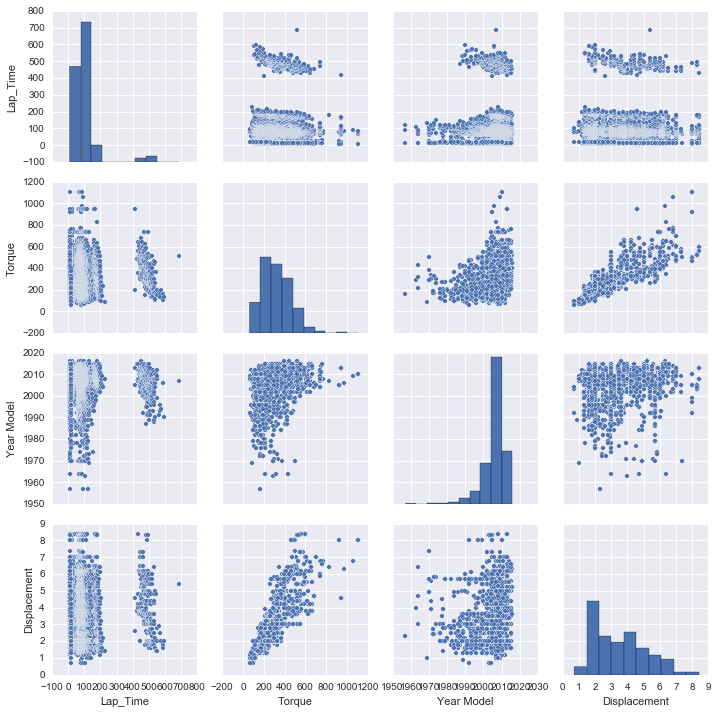

In [340]:
sns.pairplot( data[['Lap_Time', 'Torque', 'Year Model', 'Displacement']])
plt.show()

In [12]:
laptime_per_track = data.groupby('Track').agg({'Lap_Time': [np.mean, np.std]})

In [13]:
longest_tracks = laptime_per_track.sort_values(by=('Lap_Time', 'mean'), ascending = False).head(20)
top20_longest_tracks = list(longest_tracks.index.values)

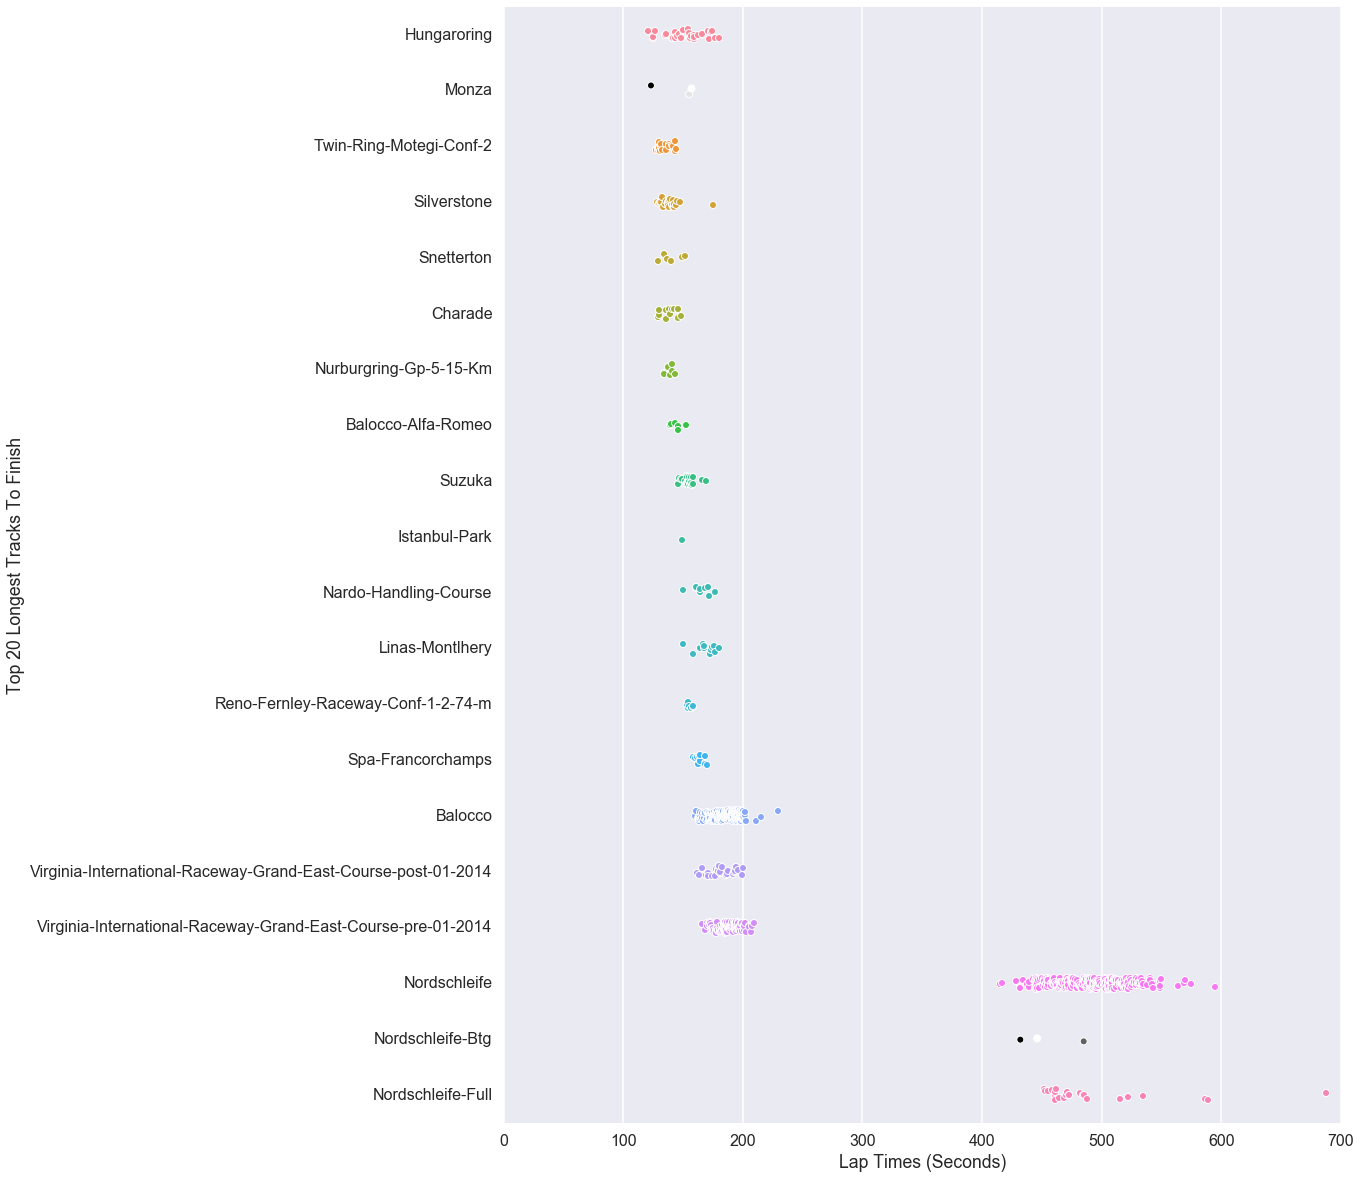

In [125]:
top20_longest_tracks_data = data.loc[data['Track'].isin(top20_longest_tracks),:]
plt.figure(figsize=(15,20))
sns.set_style('darkgrid')
sns.set_context("poster")
sns.stripplot(y='Track', x='Lap_Time', data = top20_longest_tracks_data, jitter=True)
plt.xlabel('Lap Times (Seconds)')
plt.ylabel('Top 20 Longest Tracks To Finish')
plt.xlim(0, 700)
plt.show()

In [88]:
shortest_tracks = laptime_per_track.sort_values(by=('Lap_Time', 'mean'), ascending = True).head(20)
top20_shortest_tracks = list(shortest_tracks.index.values)
top20_shortest_tracks_data = data.loc[data['Track'].isin(top20_shortest_tracks),:]

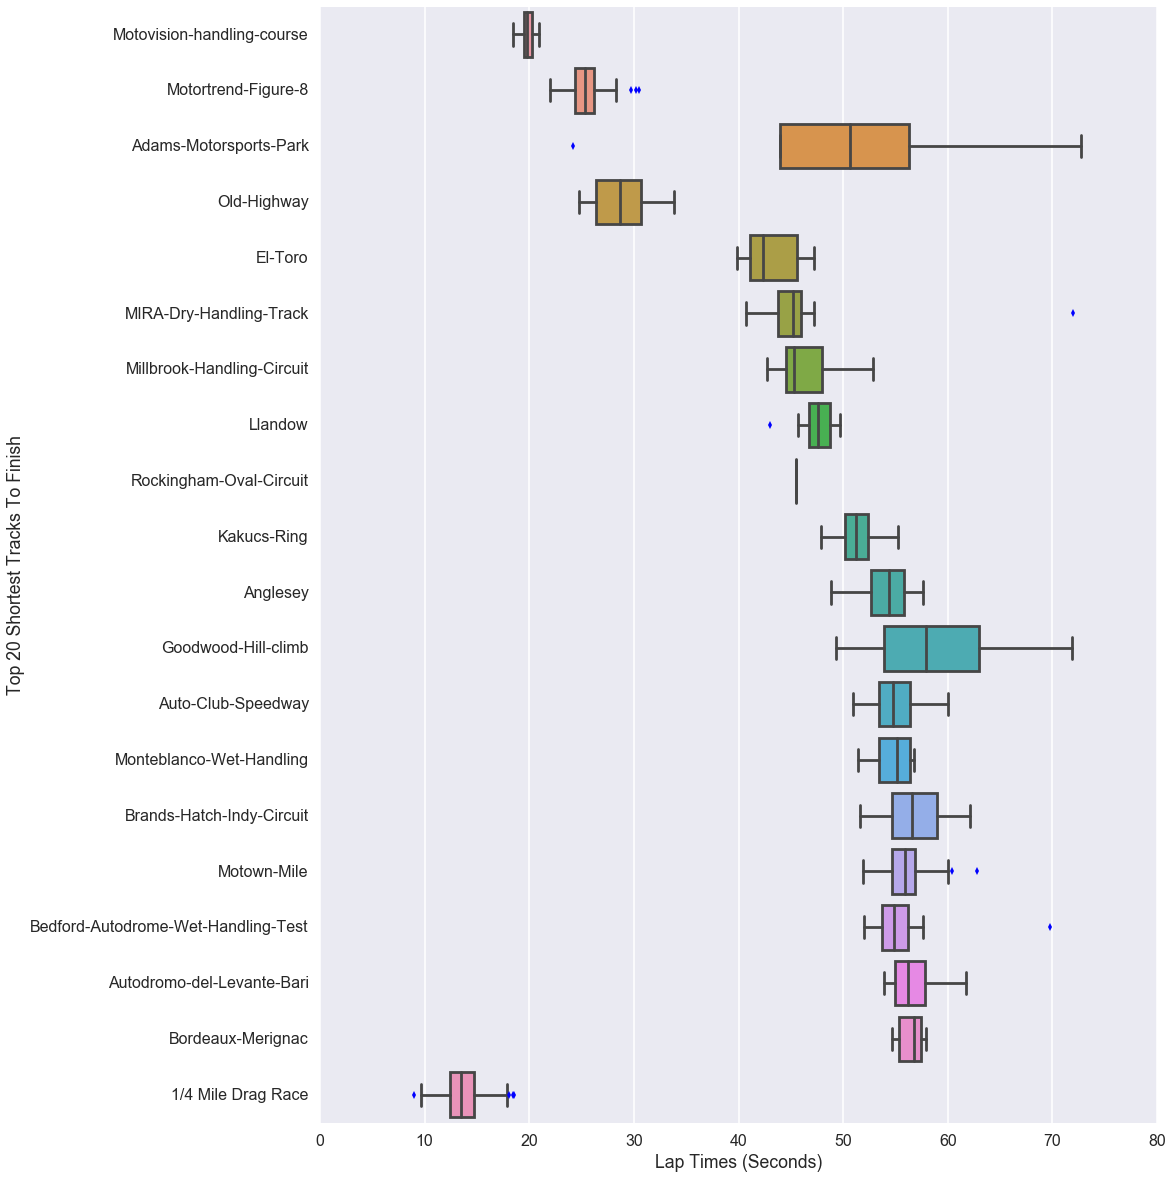

In [89]:
plt.figure(figsize=(15,20))
sns.set_context("poster")
sns.boxplot(y='Track', x='Lap_Time', data = top20_shortest_tracks_data)
plt.xlabel('Lap Times (Seconds)')
plt.ylabel('Top 20 Shortest Tracks To Finish')
plt.show()

In [40]:
longest_tracks = laptime_per_track.sort_values(by=('Lap_Time', 'mean'), ascending = False).head(3)
longest_tracks = list(longest_tracks.index.values)
longest_tracks_data = data.loc[data['Track'].isin(longest_tracks),:]

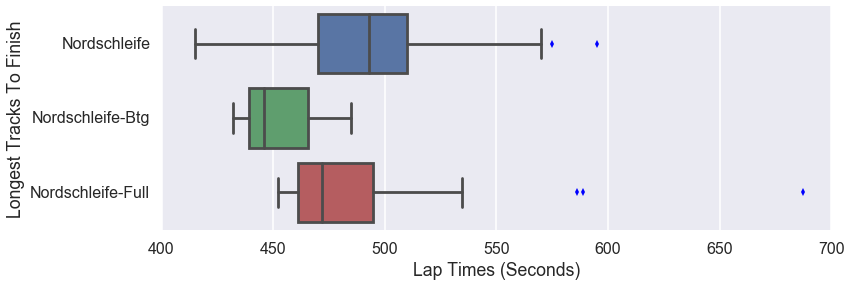

In [84]:
plt.figure(figsize=(12,4))
sns.set_context("poster")
sns.boxplot(y='Track', x='Lap_Time', data = longest_tracks_data)
plt.xlabel('Lap Times (Seconds)')
plt.ylabel('Longest Tracks To Finish')
plt.show()

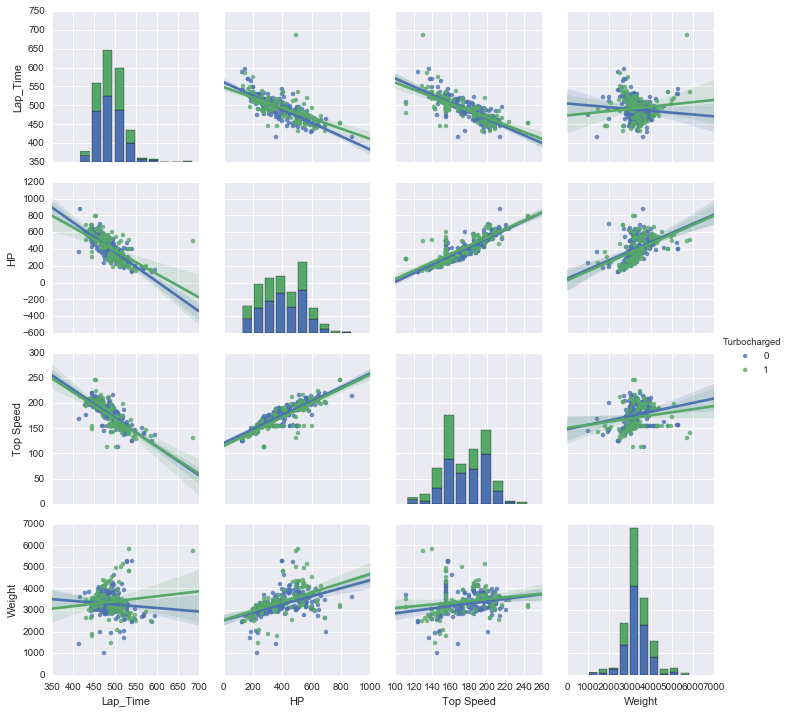

In [78]:
sns.set_context('notebook')
sns.pairplot(longest_tracks_data, vars =['Lap_Time', 'HP', 'Top Speed' , 'Weight'], kind = 'reg', hue = 'Turbocharged')
plt.show()

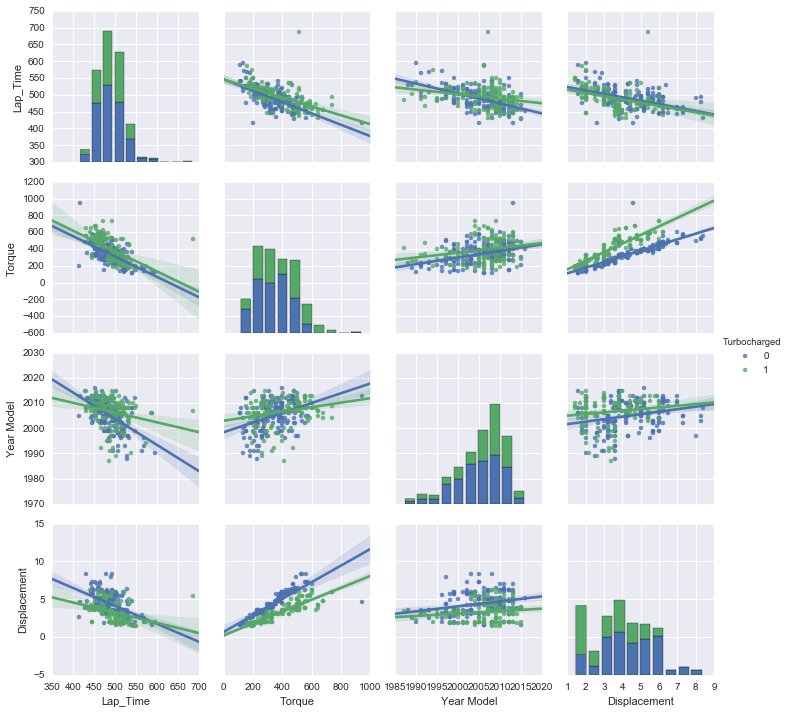

In [80]:
sns.set_context('notebook')
sns.pairplot( longest_tracks_data, vars = ['Lap_Time', 'Torque', 'Year Model', 'Displacement'], 
             hue='Turbocharged', kind = 'reg')
plt.show()

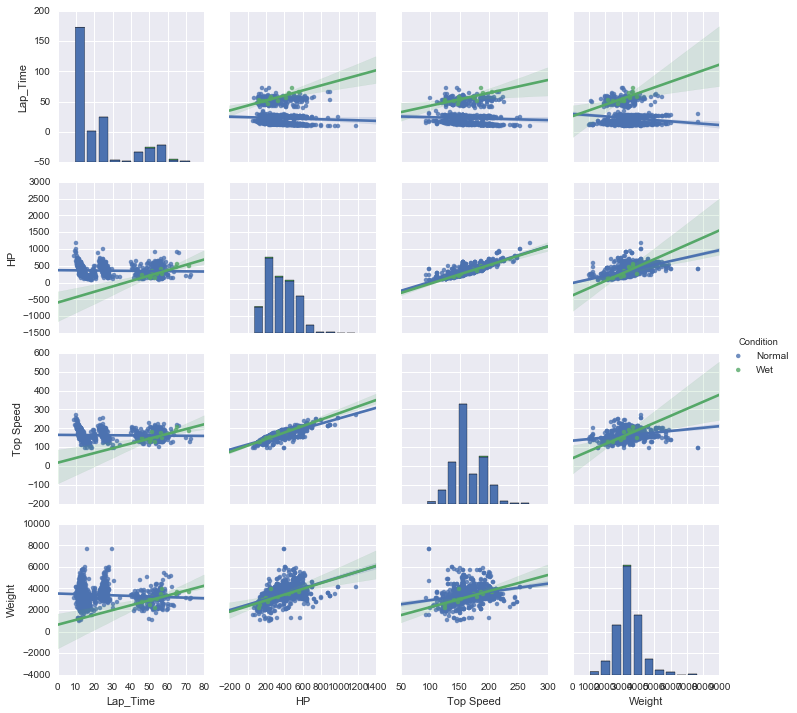

In [85]:
sns.set_context('notebook')
sns.pairplot(top20_shortest_tracks_data, vars =['Lap_Time', 'HP', 'Top Speed' , 'Weight'], kind = 'reg', hue = 'Condition')
plt.show()

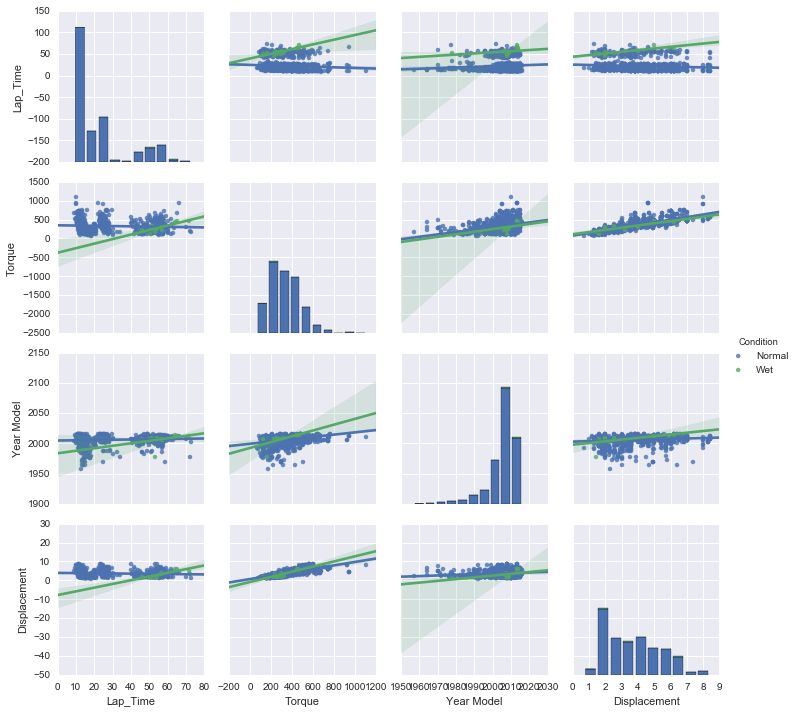

In [87]:
sns.set_context('notebook')
sns.pairplot( top20_shortest_tracks_data, vars = ['Lap_Time', 'Torque', 'Year Model', 'Displacement'], 
             hue='Condition', kind = 'reg')
plt.show()

In [92]:
shortest_tracks = laptime_per_track.sort_values(by=('Lap_Time', 'mean'), ascending = True).head(1)
drag_race = list(shortest_tracks.index.values)
drag_race_data = data.loc[data['Track'].isin(drag_race),:]

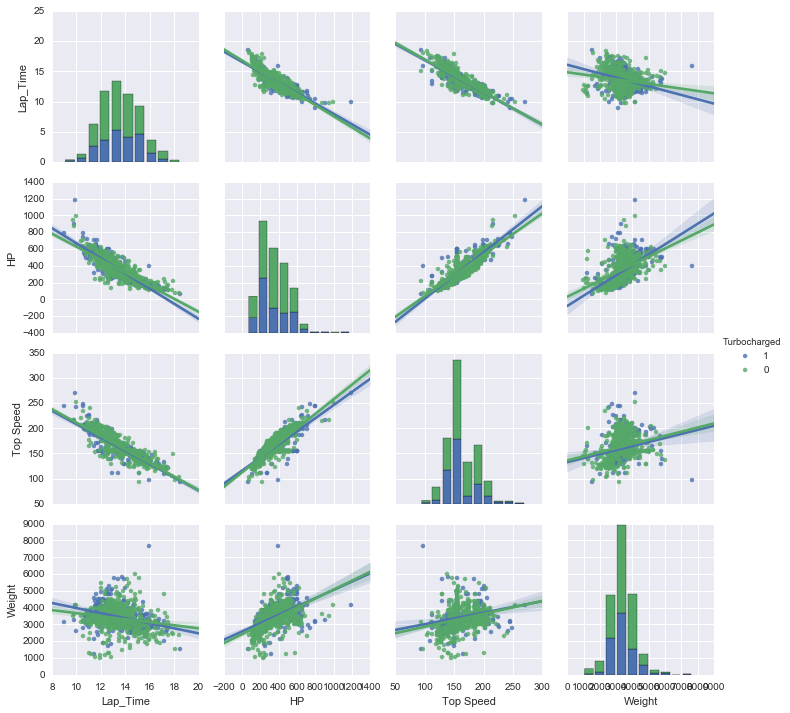

In [99]:
sns.set_context('notebook')
sns.pairplot(drag_race_data, vars =['Lap_Time', 'HP', 'Top Speed' , 'Weight'], kind = 'reg', 
             hue = 'Turbocharged',)
plt.show()

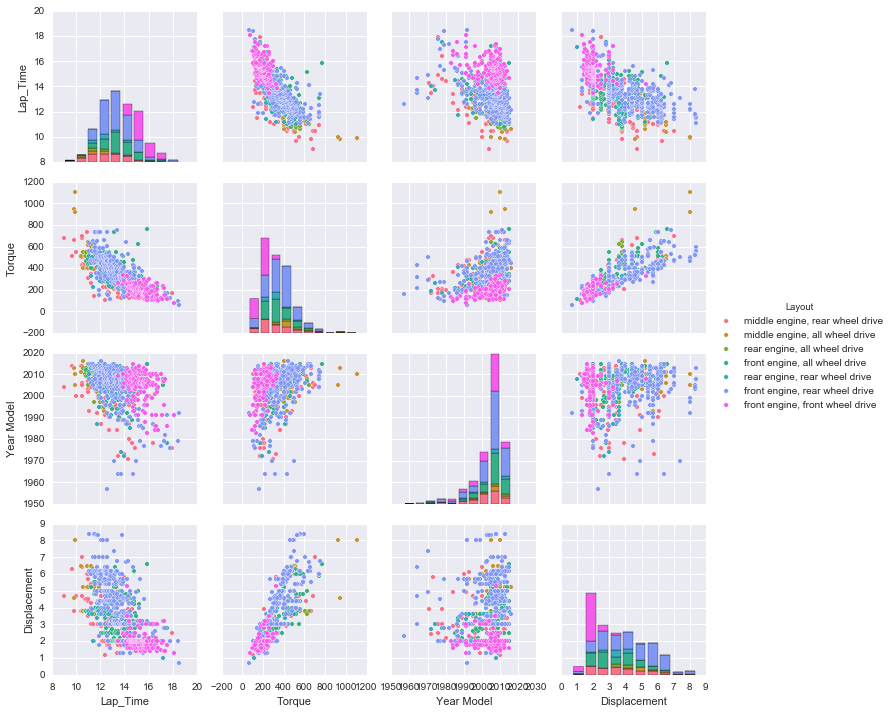

In [105]:
sns.set_context('notebook')
sns.pairplot( drag_race_data, vars = ['Lap_Time', 'Torque', 'Year Model', 'Displacement'], 
             hue='Layout', kind = 'scatter')
plt.show()

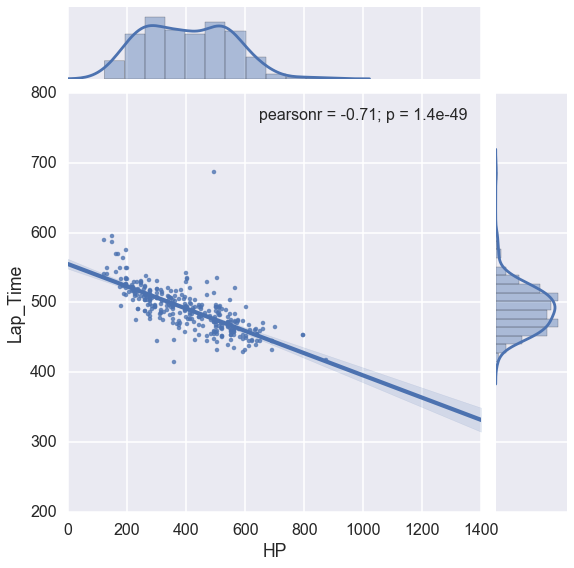

In [144]:
sns.jointplot(x='HP', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5, xlim=(0,1400))
plt.show()

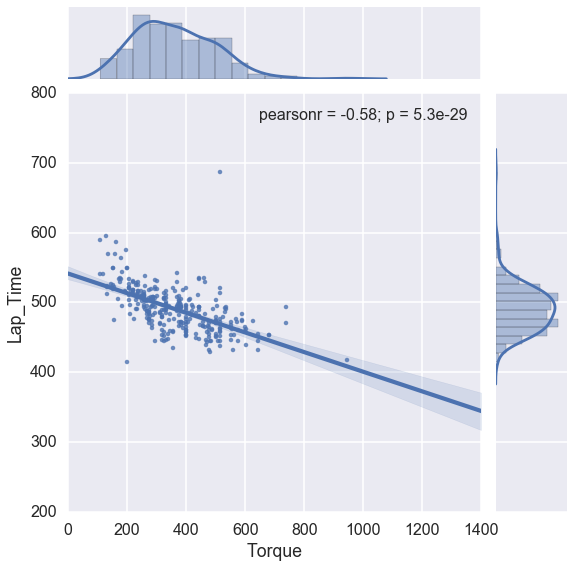

In [145]:
sns.jointplot(x='Torque', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5, xlim=(0,1400))
plt.show()

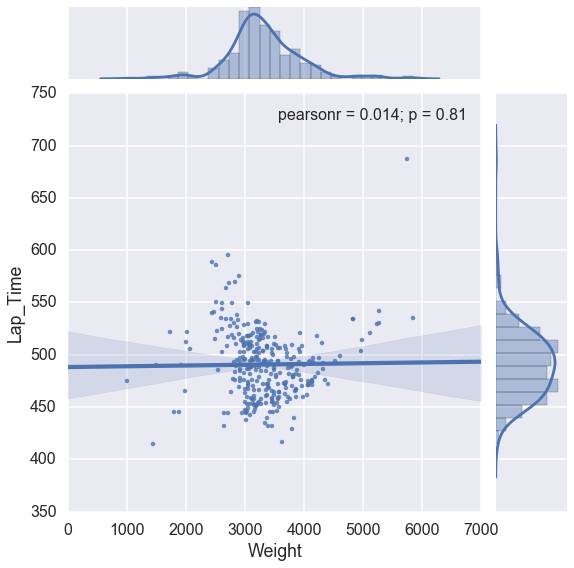

In [147]:
sns.jointplot(x='Weight', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5)
plt.show()

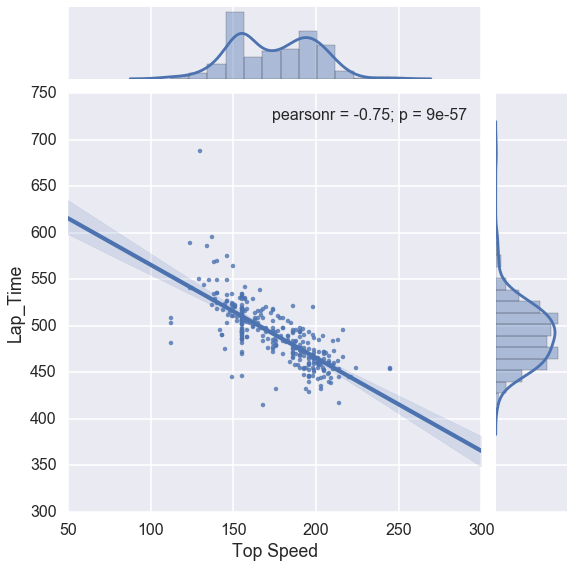

In [148]:
sns.jointplot(x='Top Speed', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5)
plt.show()

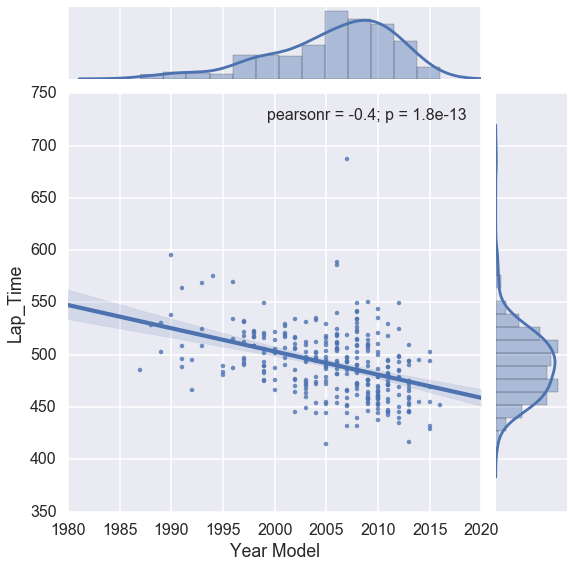

In [150]:
sns.jointplot(x='Year Model', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5, xlim=(1980,2020))
plt.show()

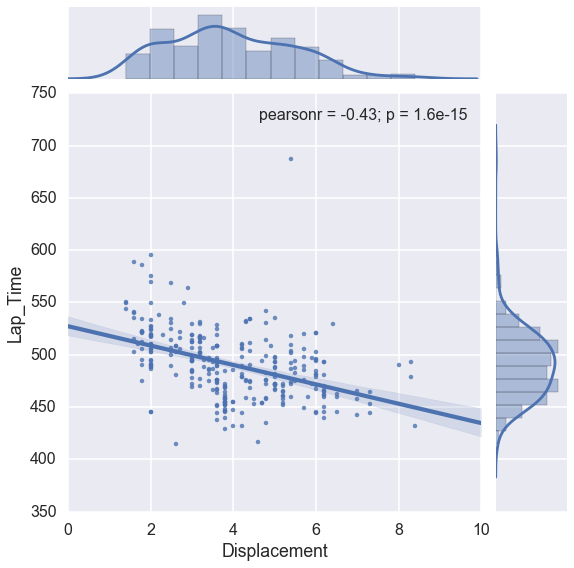

In [153]:
sns.jointplot(x='Displacement', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5, xlim=(0,10))
plt.show()

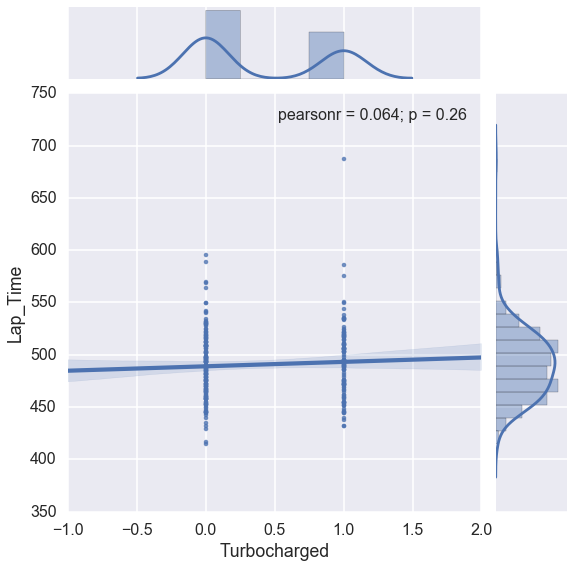

In [154]:
sns.jointplot(x='Turbocharged', y="Lap_Time", data=longest_tracks_data, kind = 'reg', size = 8, ratio = 5)
plt.show()

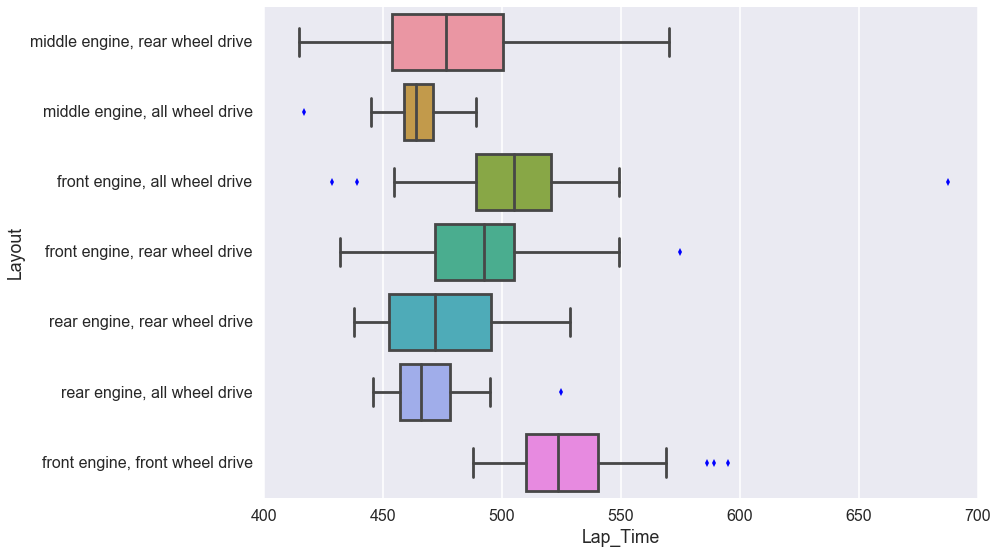

In [167]:
sns.boxplot(y='Layout', x="Lap_Time", data=longest_tracks_data)
plt.show()
